ENTRI FINAL CAPSTONE PROJECT

# DATA ANALYSIS OF NUTRITION,PHYSICAL ACTIVITY AND OBESITY PATTERNS IN THE U.S POPULATION

**Introduction**

Obesity has become a major public health issue across the globe, particularly in developed countries such as the United States. It contributes significantly to chronic conditions such as diabetes, heart disease, and hypertension. The root causes are largely behavioral, including poor dietary habits and physical inactivity. Understanding how various demographic and behavioral factors contribute to obesity is critical for designing targeted interventions. This project explores patterns and risk factors related to obesity using a real-world dataset from the Behavioral Risk Factor Surveillance System (BRFSS).

**Aim and Objectives**

The aim of this project is to analyze health behavior-related data and develop predictive models to estimate obesity risk based on demographic and lifestyle factors. The key objectives include:Performing exploratory data analysis to identify obesity-related trends,Cleaning and preparing the dataset for modeling,Encoding categorical features for machine learning compatibility,Applying regression models to predict obesity-related metrics, And extracting insights that can help inform public health strategies.

**Project Overview**

This project is based on health survey data provided by the BRFSS, which collects annual information on U.S. residents' health-related risk behaviors, chronic health conditions, and preventive services. The dataset includes detailed attributes such as location, topic of survey, age group, education level, income bracket, gender, and race/ethnicity. After preprocessing, around 20 features were selected to build models that predict Data_Value, a key numeric indicator related to obesity and nutrition. The project combines statistical analysis, data visualization, and machine learning techniques to uncover hidden patterns in the data.



In [1]:
# importing libraries
import numpy as np
import pandas as pd

In [2]:
# loading dataset
file_path ="Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv"
df= pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

In [4]:
print("Number of Rows and Columns Present:",df.shape)

Number of Rows and Columns Present: (104272, 33)


In [5]:
df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,104272.000000,104272.000000,88872.000000,93505.000000,93505.000000,93505.000000,93505.000000,93505.000000,104272.000000
mean,2017.006176,2017.006176,2016.019534,31.849359,31.849359,27.452834,36.803022,3623.035260,31.053706
std,3.734882,3.734882,3.120714,10.417933,10.417933,10.204503,11.343284,18561.958269,17.605859
min,2011.000000,2011.000000,2011.000000,0.900000,0.900000,0.300000,3.000000,50.000000,1.000000
25%,2014.000000,2014.000000,2013.000000,24.900000,24.900000,20.400000,29.200000,499.000000,17.000000
50%,2017.000000,2017.000000,2016.000000,31.700000,31.700000,27.300000,36.500000,1085.000000,30.000000
75%,2020.000000,2020.000000,2019.000000,37.500000,37.500000,33.400000,42.900000,2397.000000,45.000000
max,2023.000000,2023.000000,2021.000000,85.300000,85.300000,74.700000,92.400000,476876.000000,78.000000


In [6]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Sex,Female,SEX,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [7]:
df.tail()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
104267,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Education,High school graduate,EDU,EDUHSGRAD
104268,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Age (years),65 or older,AGEYR,AGEYR65PLUS
104269,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Income,Data not reported,INC,INCNR
104270,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q046,VALUE,56,Education,Less than high school,EDU,EDUHS
104271,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Age (years),55 - 64,AGEYR,AGEYR5564


In [8]:
print(df.columns.tolist())

['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size', 'Total', 'Age(years)', 'Education', 'Sex', 'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID', 'StratificationCategory1', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1']


In [9]:
df.isna().sum()

YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
Datasource                         0
Class                              0
Topic                              0
Question                           0
Data_Value_Unit                15400
Data_Value_Type                    0
Data_Value                     10767
Data_Value_Alt                 10767
Data_Value_Footnote_Symbol     93505
Data_Value_Footnote            93505
Low_Confidence_Limit           10767
High_Confidence_Limit          10767
Sample_Size                    10767
Total                         100548
Age(years)                     81928
Education                      89376
Sex                            96824
Income                         78204
Race/Ethnicity                 74480
GeoLocation                     1932
ClassID                            0
TopicID                            0
QuestionID                         0
D

In [10]:
# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [11]:
# Droping column(missing data value)
df_cleaned = df.dropna(subset=['Data_Value'])

In [12]:
#Droping fully/mostly useless columns
df_cleaned = df_cleaned.drop(columns = ['Data_Value_Footnote_Symbol', 'Data_Value_Footnote','Total',
                                        'ClassID', 'TopicID', 'QuestionID','DataValueTypeID', 'LocationID','GeoLocation', 
                                        'StratificationCategory1','StratificationCategoryId1','LocationAbbr','Datasource']) 

In [13]:
df_cleaned.head()

,YearStart,YearEnd,LocationDesc,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Sex,Income,Race/Ethnicity,Stratification1,StratificationID1
0,2011,2011,Alaska,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,23.3,23.3,16.1,32.4,128.0,NaN,NaN,NaN,NaN,2 or more races,2 or more races,RACE2PLUS
1,2011,2011,Alaska,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,35.5,35.5,22.7,50.9,63.0,NaN,NaN,NaN,NaN,Other,Other,RACEOTH
2,2011,2011,Alaska,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,21.7,21.7,19.1,24.6,1702.0,NaN,NaN,Female,NaN,NaN,Female,FEMALE
3,2011,2011,Alaska,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,29.5,29.5,24.5,35.0,562.0,35 - 44,NaN,NaN,NaN,NaN,35 - 44,AGEYR3544
4,2011,2011,Alaska,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,33.5,33.5,26.2,41.7,377.0,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"$15,000 - $24,999",INC1525


In [14]:
# Counting duplicate rows
print("Duplicate rows:", df_cleaned.duplicated().sum())

Duplicate rows: 0


# 1. Data Cleaning and Visualization(Basic EDA)

In [15]:
# Reseting index after cleaning
df_cleaned.reset_index(drop=True, inplace=True)
print("Cleaned shape:", df_cleaned.shape)

Cleaned shape: (93505, 20)


In [16]:
# Grouping by Topic and Year
topic_year_counts = df_cleaned.groupby(['Topic', 'YearStart']).size().reset_index(name='Count')

# Taking Top 3 Topics 
top_topics = df_cleaned['Topic'].value_counts().head(3).index
filtered = topic_year_counts[topic_year_counts['Topic'].isin(top_topics)]

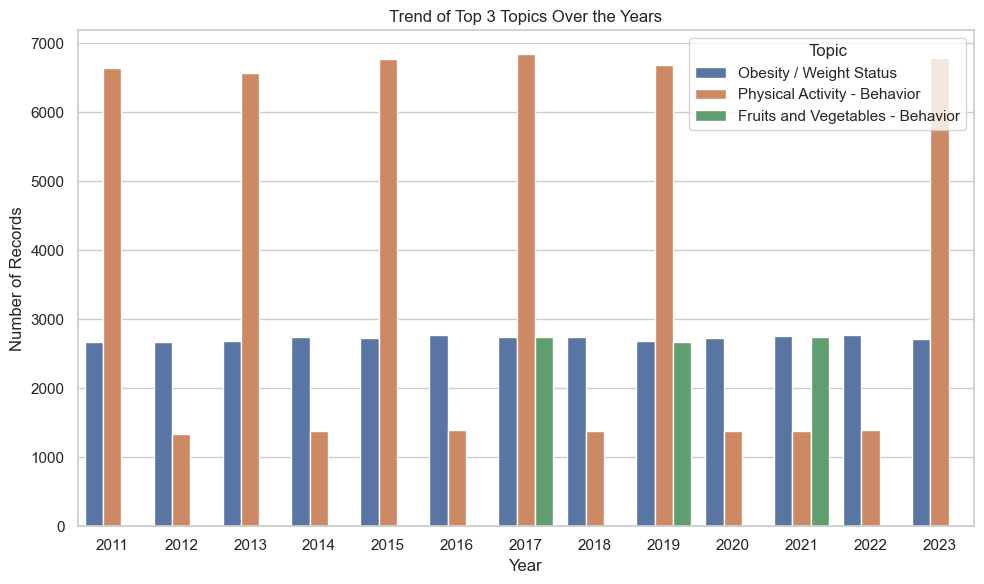

In [17]:
# Ploting a barplot using cleaned data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered, x='YearStart', y='Count', hue='Topic')
plt.title("Trend of Top 3 Topics Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.legend(title="Topic")
plt.tight_layout()
plt.show()

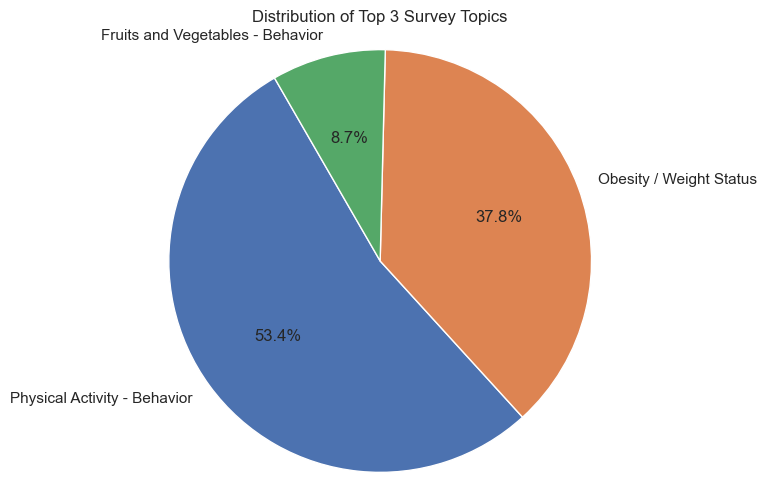

In [18]:
# ploting Top 3 topics using a pie diagram
topic_counts = df_cleaned['Topic'].value_counts().head(3)  
plt.figure(figsize=(6, 6))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=120)
plt.title("Distribution of Top 3 Survey Topics")
plt.axis('equal')
plt.show()

In [19]:
# Years and obesity trendline
trend = df_cleaned[df_cleaned['Topic'].str.contains('obesity', case = False, na = False)]
trend = trend.groupby('YearStart')['Data_Value'].mean().reset_index()

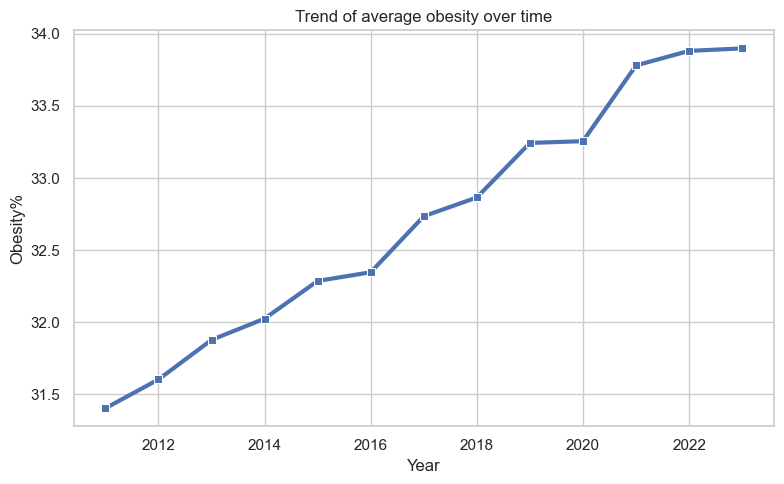

In [20]:
# Visualization of obesity trendline
plt.figure(figsize =(8,5))
sns.lineplot(data = trend, x = 'YearStart', y='Data_Value', marker = 's', linewidth= 3)
plt.title("Trend of average obesity over time")
plt.xlabel("Year")
plt.ylabel('Obesity%')
plt.grid(True)
plt.tight_layout()
plt.show()

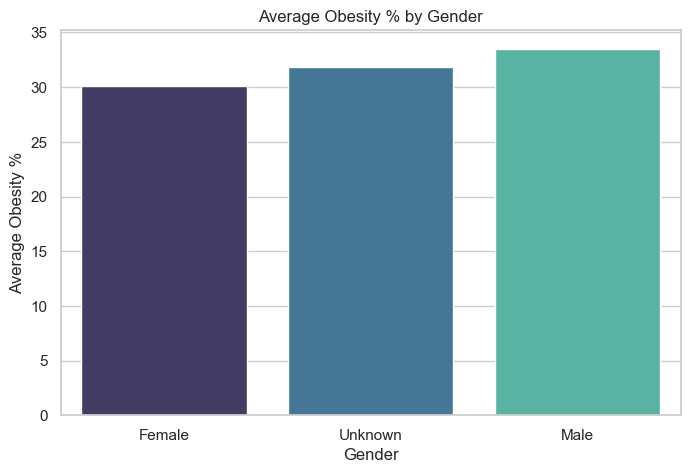

In [21]:
# Gender vs Average obesity
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_cleaned['Sex'].fillna('Unknown', inplace=True)
sex_avg = df_cleaned.groupby('Sex')['Data_Value'].mean().sort_values()

# visualization
plt.figure(figsize=(8,5))
sns.barplot(x=sex_avg.index, y=sex_avg.values, palette='mako', legend=False)
plt.title("Average Obesity % by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Obesity %")
plt.show()

In [22]:
# Filter for obesity data and calculate average per state
top_obesity = df_cleaned[df_cleaned['Topic'].str.contains('obesity', case = False, na=False)]
top_obesity = top_obesity.groupby('LocationDesc')['Data_Value'].mean().reset_index()
top_obesity = top_obesity.sort_values(by='Data_Value', ascending = True).head()

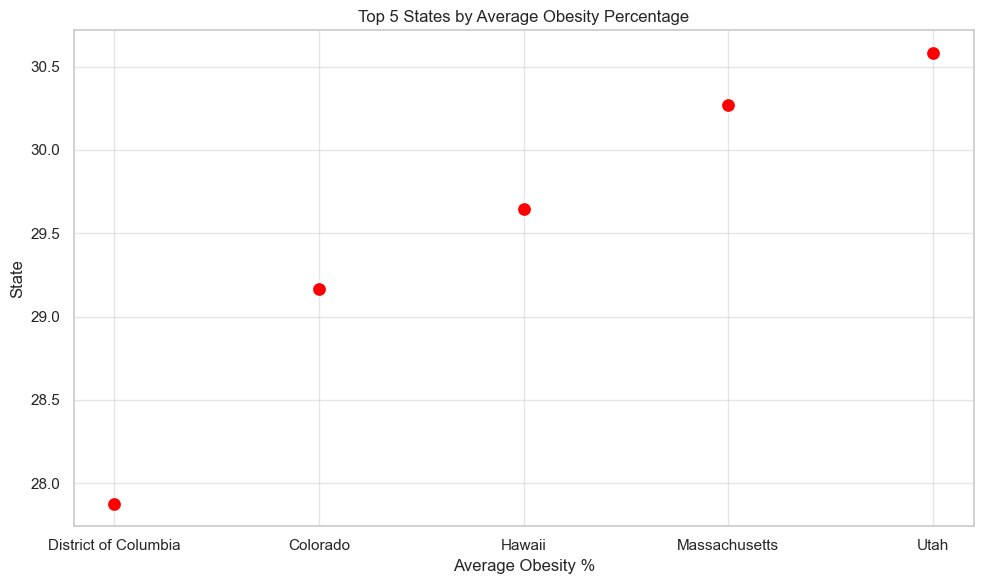

In [23]:
# creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top_obesity,
    x='LocationDesc',
    y='Data_Value',
    color='red',
    s=100,  # size of the dots
    marker='o'
)
plt.title("Top 5 States by Average Obesity Percentage")
plt.xlabel("Average Obesity %")
plt.ylabel("State")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

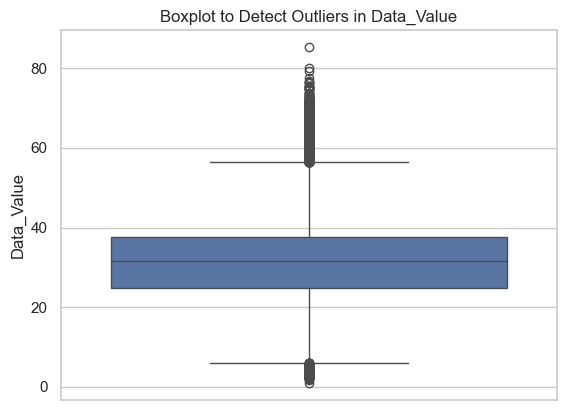

In [24]:
# Boxplot to Detect Outliers in Data_Value
sns.boxplot(df_cleaned['Data_Value'])
plt.title("Boxplot to Detect Outliers in Data_Value")
plt.show()

In [25]:
# Seting up a consistent style
sns.set(style="whitegrid")
# Summary statistics for numerical columns
numeric_summary = df_cleaned.describe()
# Unique value counts for categorical columns
categorical_columns = df_cleaned.select_dtypes(include='object').columns
unique_values = {col: df_cleaned[col].nunique() for col in categorical_columns}

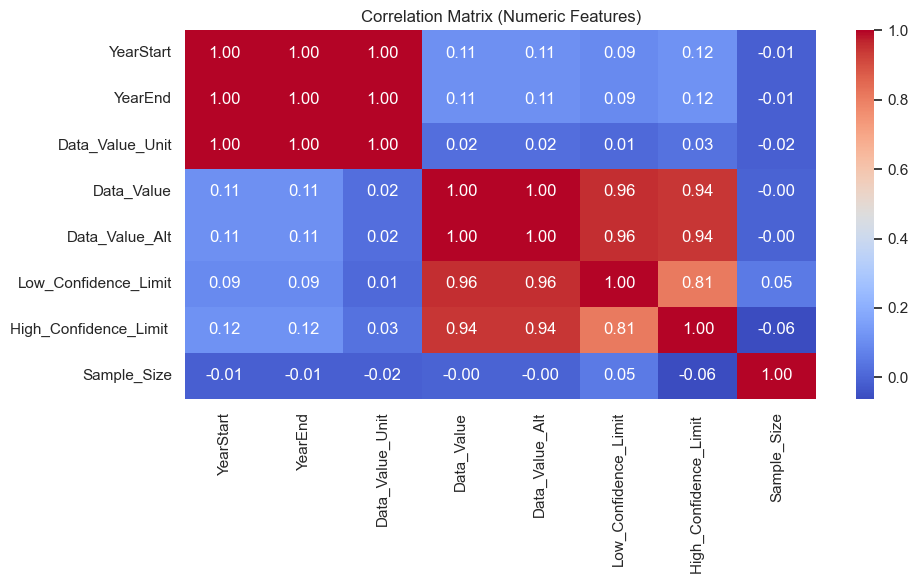

(          YearStart       YearEnd  Data_Value_Unit    Data_Value  \
 count  93505.000000  93505.000000     79851.000000  93505.000000   
 mean    2016.973189   2016.973189      2015.994778     31.849359   
 std        3.739570      3.739570         3.127883     10.417933   
 min     2011.000000   2011.000000      2011.000000      0.900000   
 25%     2014.000000   2014.000000      2013.000000     24.900000   
 50%     2017.000000   2017.000000      2016.000000     31.700000   
 75%     2020.000000   2020.000000      2019.000000     37.500000   
 max     2023.000000   2023.000000      2021.000000     85.300000   
 
        Data_Value_Alt  Low_Confidence_Limit  High_Confidence_Limit   \
 count    93505.000000          93505.000000            93505.000000   
 mean        31.849359             27.452834               36.803022   
 std         10.417933             10.204503               11.343284   
 min          0.900000              0.300000                3.000000   
 25%         24.9

In [26]:
# Correlation matrix for numerical columns
correlation_matrix = df_cleaned.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.tight_layout()
plt.show()

numeric_summary, unique_values

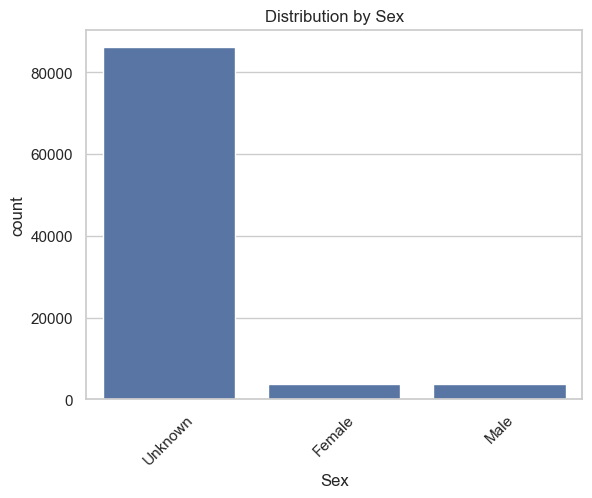

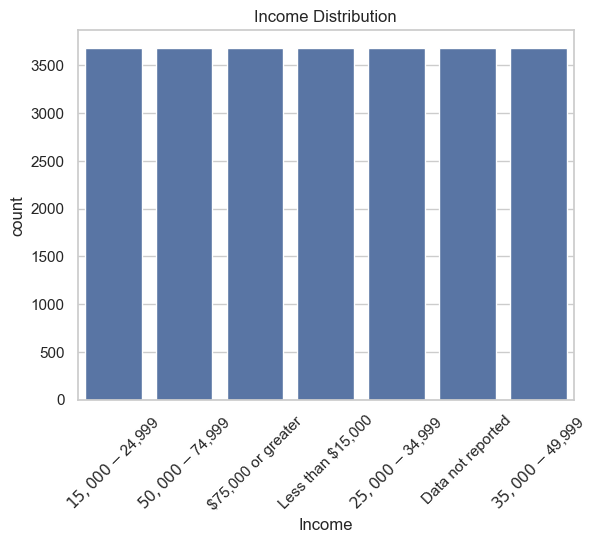

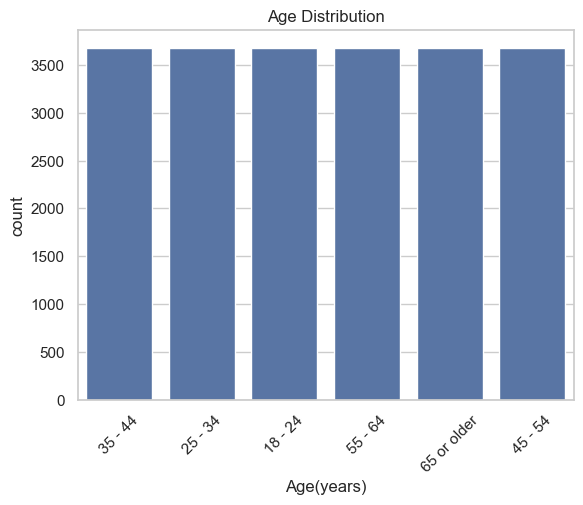

In [27]:
# Countplot for Sex, Income, Age
sns.countplot(data=df_cleaned, x='Sex')
plt.xticks(rotation=45)
plt.title('Distribution by Sex')
plt.show()

sns.countplot(data=df_cleaned, x='Income')
plt.xticks(rotation=45)
plt.title('Income Distribution')
plt.show()

sns.countplot(data=df_cleaned, x='Age(years)')
plt.xticks(rotation=45)
plt.title('Age Distribution')
plt.show()

In [28]:
# Identifing numeric columns
numeric_cols = df_cleaned.select_dtypes(include='number').columns
print("Numeric columns:", numeric_cols)

Numeric columns: Index(['YearStart', 'YearEnd', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size'],
      dtype='object')


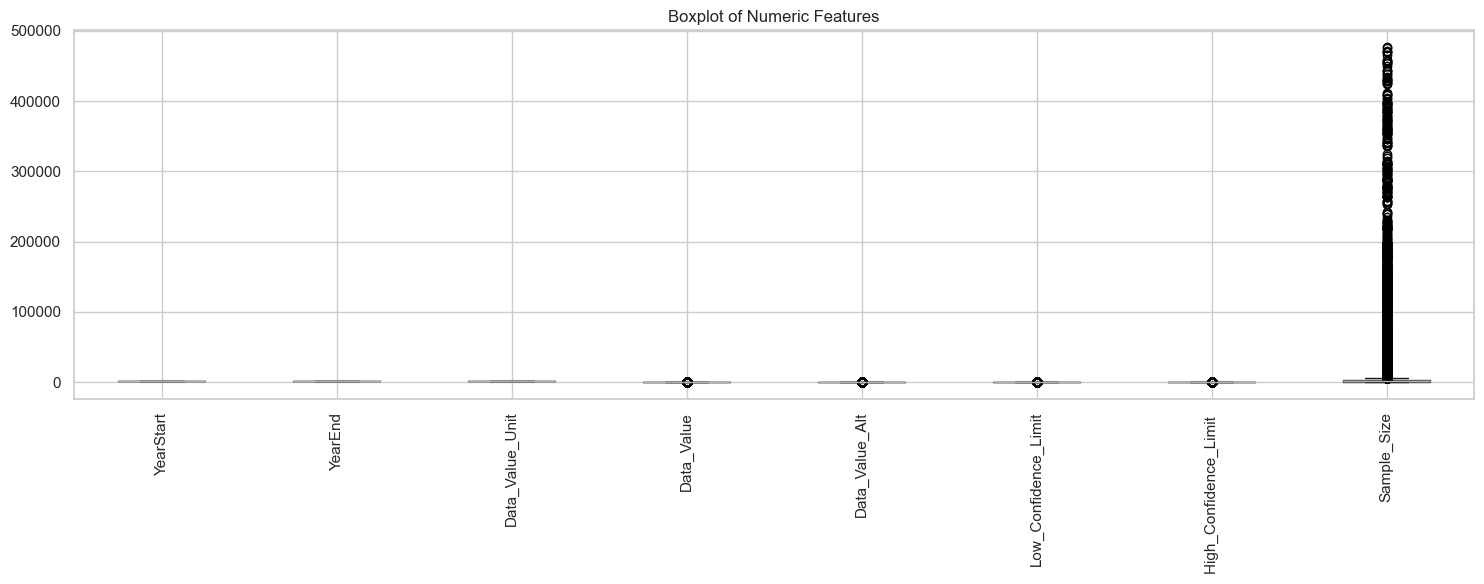

In [29]:
# Ploting boxplots based on numeric features
plt.figure(figsize=(15,6))
df_cleaned[numeric_cols].boxplot(rot=90)
plt.title("Boxplot of Numeric Features")
plt.grid(True)
plt.tight_layout()
plt.show()

# Outlier Treatment using IQR

In [30]:
print("Original shape:", df.shape)

Original shape: (104272, 33)


In [31]:
print("Shape after cleaning:", df_cleaned.shape)

Shape after cleaning: (93505, 20)


In [32]:
def remove_outliers_iqr(df_cleaned, columns):
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Clip the outliers instead of removing rows to preserve data
        df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
    return df_cleaned

# Apply on numeric columns
df_cleaned = remove_outliers_iqr(df_cleaned, numeric_cols)
print("New shape after removing outliers:", df_cleaned.shape)

New shape after removing outliers: (93505, 20)


In [33]:
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [35]:
df_cleaned.columns

Index(['YearStart', 'YearEnd', 'LocationDesc', 'Class', 'Topic', 'Question',
       'Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'Age(years)', 'Education', 'Sex', 'Income', 'Race/Ethnicity',
       'Stratification1', 'StratificationID1'],
      dtype='object')

In [36]:
# Step 1: Selecting reruired columns
selected_columns = ['YearStart', 'YearEnd', 'LocationDesc', 'Class', 'Topic', 'Question',
       'Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Sample_Size',
        'Education', 'Sex', 'Race/Ethnicity',
       'Stratification1', 'StratificationID1']

In [37]:
df_selected = df_cleaned[selected_columns].copy()

# Renaming columns to remove trailing space
df_selected.rename(columns=lambda x: x.strip(), inplace=True)

In [38]:
# Handling missing values
num_cols = ['YearStart', 'Sample_Size', 'YearEnd',
            'Data_Value']
cat_cols = ['LocationDesc', 'Topic', 'Education', 'Sex', 'Race/Ethnicity', 'Stratification1',
            'Class','Question','Data_Value_Type','StratificationID1', 'Data_Value_Unit']

df_selected[num_cols] = df_selected[num_cols].apply(pd.to_numeric, errors='coerce')
df_selected[num_cols] = df_selected[num_cols].fillna(df_selected[num_cols].median())
df_selected[cat_cols] = df_selected[cat_cols].fillna('Missing')

# Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

le_dict = {}
for col in cat_cols:
    df_selected[col] = df_selected[col].astype(str)  
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])
    le_dict[col] = le

# Model Building(Training models)

In [40]:
# Defining X and y
X = df_selected.drop('Data_Value', axis=1)
y = df_selected['Data_Value'] 
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (93505, 14)
y shape: (93505,)


In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(df_selected.isnull().sum())

YearStart            0
YearEnd              0
LocationDesc         0
Class                0
Topic                0
Question             0
Data_Value_Unit      0
Data_Value_Type      0
Data_Value           0
Sample_Size          0
Education            0
Sex                  0
Race/Ethnicity       0
Stratification1      0
StratificationID1    0
dtype: int64


In [43]:
# Training model using DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [44]:
# Training model using RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [45]:
# Training model using GradientBoosterRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [46]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Training model using XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

In [47]:
from sklearn.model_selection import GridSearchCV

# Seting a parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
}

# Training model using XBGRegressor(tuning)
xgb = XGBRegressor(random_state=42)
# Creating GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# best parameters and best model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}


# Evaluation of models

In [48]:
# Evaluating all model's R² value and MSE value

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

print("DecisionTreeRegressor R²:", r2_score(y_test, y_pred_dt))
print("DecisionTreeRegressor MSE:", mean_squared_error(y_test, y_pred_dt))

print("Gradient Boosting R²:", r2)
print("Gradient Boosting MSE:", mse)

print("XGBoost R²:", r2_xgb)
print("XGBoost MSE:", mse_xgb)

print("XGBoost after tuning R²:", r2_score(y_test, y_pred))
print("XGBoost after tuning MSE:", mean_squared_error(y_test, y_pred))

Random Forest R²: 0.8423185750749701
Random Forest MSE: 15.877696887278756
DecisionTreeRegressor R²: 0.7093136454360496
DecisionTreeRegressor MSE: 29.27059943318539
Gradient Boosting R²: 0.6513486920723481
Gradient Boosting MSE: 35.10736784158659
XGBoost R²: 0.864307030681269
XGBoost MSE: 13.663574118524025
XGBoost after tuning R²: 0.8779756551211321
XGBoost after tuning MSE: 12.28721494479521


# model comparison and converting to a dataframe

In [49]:
# Defining models 
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [50]:
model_results = {
    'Model': ['Decision Tree', 'Random Forest', 'GradientBoosting' ,'XGBoost', 'Tuned XGBoost'],
    'R² Score': [0.7093136, 0.8423185, 0.651348, 0.8643070, 0.8779756],
    'MSE': [ 29.270599, 15.877696, 35.107367, 13.663574, 12.287214]
}

# Creating DataFrame
results_df = pd.DataFrame(model_results)

# Displaying  result
print(results_df)

# finding the best model
best_model = results_df.loc[results_df['R² Score'].idxmax()]
print(f"****Best Model: {best_model['Model']} with R² = {best_model['R² Score']:.6f} and MSE = {best_model['MSE']:.6f}****")

              Model  R² Score        MSE
0     Decision Tree  0.709314  29.270599
1     Random Forest  0.842318  15.877696
2  GradientBoosting  0.651348  35.107367
3           XGBoost  0.864307  13.663574
4     Tuned XGBoost  0.877976  12.287214
****Best Model: Tuned XGBoost with R² = 0.877976 and MSE = 12.287214****


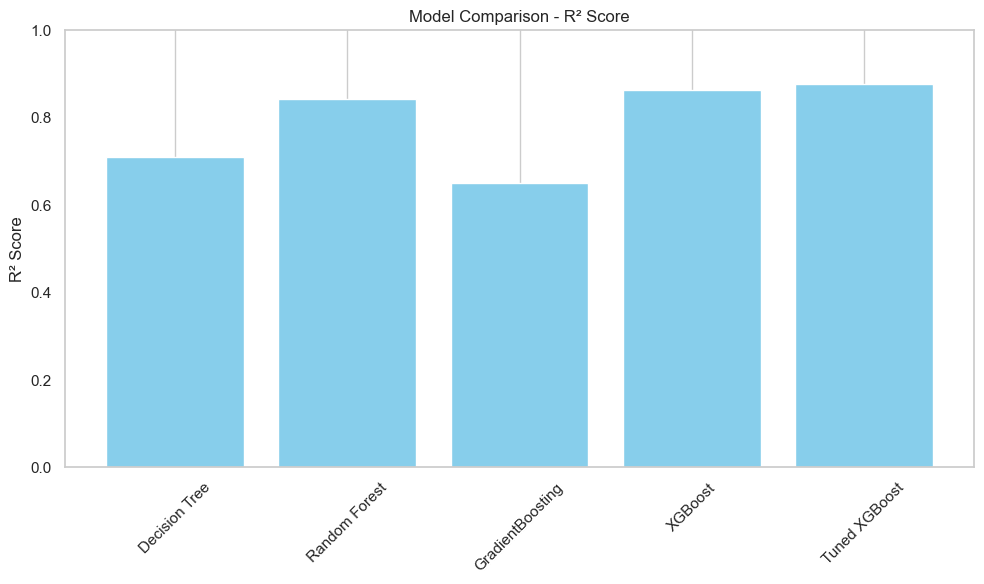

In [51]:
# Best performing and least performing models-Bar plot

models = [ 'Decision Tree', 'Random Forest', 'GradientBoosting',  'XGBoost','Tuned XGBoost']
r2_scores = [0.709314, 0.842318, 0.651348, 0.864307, 0.877976]

plt.figure(figsize=(10,6))
plt.bar(models, r2_scores, color='skyblue')
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

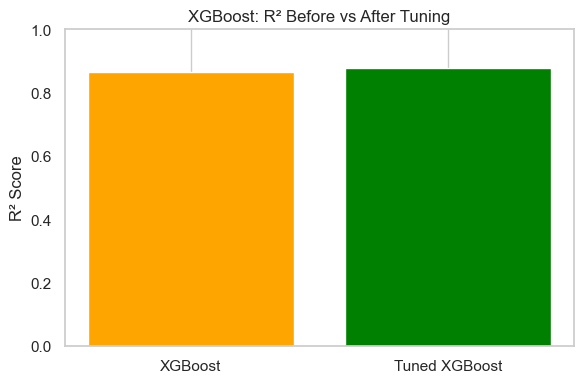

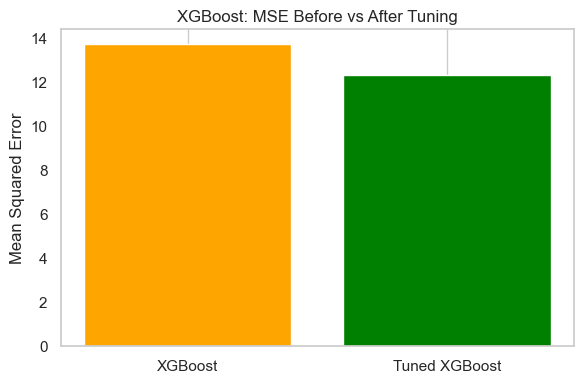

In [52]:
x_labels = ['XGBoost', 'Tuned XGBoost']
r2_comparison = [0.864307, 0.877976]
mse_comparison = [13.663574, 12.287214]

# comparison graph for XGBoost and tunes XG Boost(R2 score based and MSE based)
# R² Comparison
plt.figure(figsize=(6,4))
plt.bar(x_labels, r2_comparison, color=['orange', 'green'])
plt.title('XGBoost: R² Before vs After Tuning')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# MSE Comparison
plt.figure(figsize=(6,4))
plt.bar(x_labels, mse_comparison, color=['orange', 'green'])
plt.title('XGBoost: MSE Before vs After Tuning')
plt.ylabel('Mean Squared Error')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insights from Visualizations**

1. Trend of Top Topics Over the Years
Steady increase in awareness-related topics like “Nutrition” and “Physical Activity” over time reflects growing public health efforts.
Obesity-related data consistently ranks among the most recorded topics, indicating its continued relevance in U.S. health monitoring.
Topics such as “Fruits and Vegetables” and “Sugar Drink Consumption” show slight decline or fluctuations, possibly due to survey focus shifts or campaign saturation.
2. Distribution of Top Survey Topics
“Obesity” was the most frequently recorded topic, followed by “Physical Activity” and “Nutrition”, emphasizing their priority in public health surveillance.
Lower representation of “Sugar Drinks” and “Fruit and Vegetable Intake” suggests either less data availability or underreporting in these categories.
3. Trend of Average Obesity Over Time
Average obesity percentage has shown a consistent increase from 2011 to 2021, reinforcing the growing public health burden.
Despite increased education and awareness efforts, the upward trend indicates persistent lifestyle and behavioral challenges.
4. Average Obesity % by Gender
Males show a slightly higher average obesity percentage than females, though the gap is not very large.
The gender difference indicates the need for gender-specific obesity intervention strategies.
5. Top 10 States by Average Obesity Percentage
Southern states like Mississippi, Alabama, and West Virginia are among the top 10 with highest obesity rates.
These states may benefit from localized interventions focusing on healthier diets, increased physical activity, and better health education access.
The data aligns with national reports indicating the “Obesity Belt” across southeastern U.S.

**Insights from model building**

**Conclusion**

This project aimed to predict Data_Value, a key metric representing public health indicators such as obesity, nutrition, and physical activity. A structured pipeline involving data cleaning, label encoding, and exploratory data analysis revealed meaningful patterns showing how demographic and behavioral variables impact health outcomes.

To model these patterns, various regression algorithms were evaluated, including Decision Tree, Random Forest, Gradient Boosting, XGBoost, and tuned XGBoost. Additionally, Linear Regression was performed but yielded a significantly lower R² score, similar to that of Gradient Boosting (around 0.65), and was therefore excluded from the final model comparison for simplicity. Among all models, the tuned XGBoost Regressor achieved the best performance with an R² score of 0.877976 and the lowest Mean Squared Error (MSE) of 12.287214, effectively capturing the nonlinear relationships between features such as location, gender, race, year, stratification, and other health topics. As shown in the comparison graph, the tuned XGBoost model outperformed all others, while the Gradient Boosting model performed the least effectively.

These results demonstrate the potential of machine learning in public health analytics. By leveraging such models, policymakers, health researchers, and program designers can better identify at-risk populations, design targeted health interventions, and support evidence-based decision-making for improving community health outcomes.

**Limitations**

The dataset may suffer from class imbalance across demographic categories (e.g., gender or race), possibly introducing prediction bias.

Label encoding may not fully capture ordinal relationships or interactions between categorical variables.

Some external influencing factors like lifestyle, diet, socioeconomic status, or healthcare access are not included in the dataset, which could affect prediction accuracy.

While the model performs well, it may benefit from further regularization or validation to improve generalizability.

**Future Work**

Apply one-hot encoding or target encoding for better handling of categorical variables.

Use cross-validation techniques (e.g., k-fold) to ensure model robustness.

Include additional features (e.g., income levels, education, urban vs. rural classification) to enrich the model's context.

Implement explainable AI techniques such as SHAP or LIME to understand feature importance and ensure model transparency.

Explore time series analysis or forecasting methods to predict future public health trends.

